<a href="https://colab.research.google.com/github/vaishnavisureshbabu010905/ml-lab/blob/main/exp_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

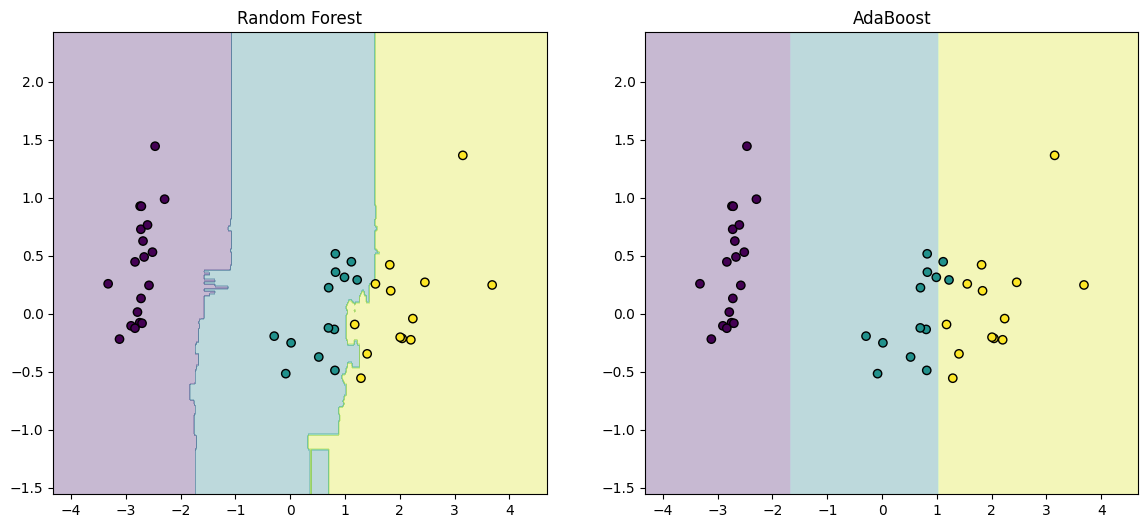

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA

# Load Iris dataset and split into train and test sets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reduce dimensionality for visualization purposes
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_2d, y_train)

# Train AdaBoost classifier
ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train_2d, y_train)

# Function to plot decision boundaries
def plot_decision_boundaries(clf, X, y, ax, title):
    h = .02 # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    ax.set_title(title)

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot Random Forest decision boundaries
plot_decision_boundaries(rf_clf, X_test_2d, y_test, axs[0], 'Random Forest')

# Plot AdaBoost decision boundaries
plot_decision_boundaries(ada_clf, X_test_2d, y_test, axs[1], 'AdaBoost')

plt.show()